In [267]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [268]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [269]:
df = pd.read_csv("/content/drive/MyDrive/大數據分析/miami-housing.csv")
df

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


In [270]:
df.drop('PARCELNO',1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   SALE_PRC           13932 non-null  float64
 3   LND_SQFOOT         13932 non-null  int64  
 4   TOT_LVG_AREA       13932 non-null  int64  
 5   SPEC_FEAT_VAL      13932 non-null  int64  
 6   RAIL_DIST          13932 non-null  float64
 7   OCEAN_DIST         13932 non-null  float64
 8   WATER_DIST         13932 non-null  float64
 9   CNTR_DIST          13932 non-null  float64
 10  SUBCNTR_DI         13932 non-null  float64
 11  HWY_DIST           13932 non-null  float64
 12  age                13932 non-null  int64  
 13  avno60plus         13932 non-null  int64  
 14  month_sold         13932 non-null  int64  
 15  structure_quality  13932 non-null  int64  
dtypes: float64(9), int64(7

<ipython-input-270-fe97bc1f8ab7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('PARCELNO',1,inplace=True)


([<matplotlib.axis.XTick at 0x7f8251773f70>,
 <a list of 52 Text major ticklabel objects>)

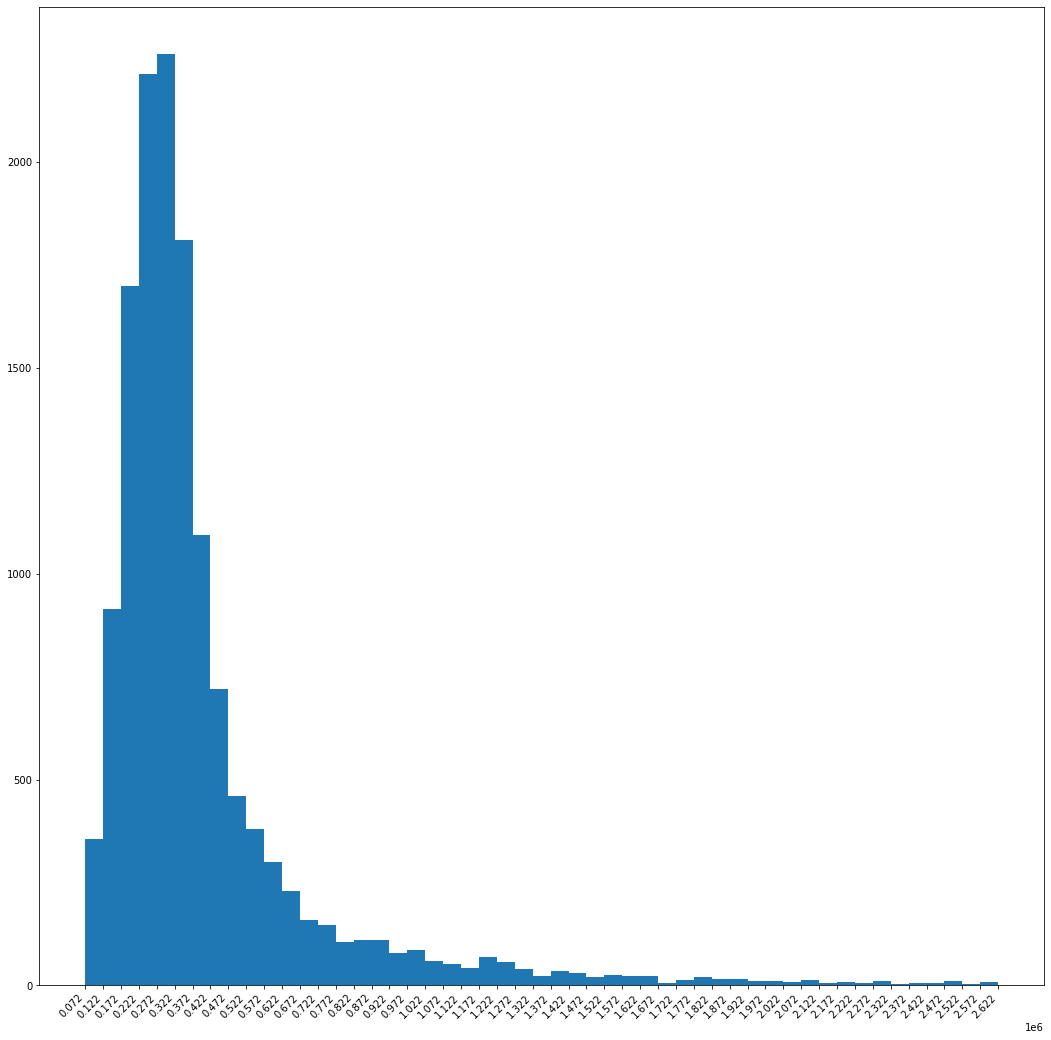

In [273]:
range_hist = range(int(min(df['SALE_PRC'])),int(max(df['SALE_PRC'])),int(0.5*(10**5)))
range_hist
plt.figure(figsize=(18,18))
plt.hist(df['SALE_PRC'],bins=range_hist)
plt.xticks(range_hist,rotation="45", ha="right")

In [274]:
def quarter(test):
  print("Q1:%d"%test.quantile(0.25))
  print("Q2:%d"%test.quantile(0.5))
  print("Q3:%d"%test.quantile(0.75))
  print("IQR:%d"%(test.quantile(0.75)-test.quantile(0.25)))
  a=test.quantile(0.75)-test.quantile(0.25)
  print("最大值區間:%d"%(test.quantile(0.75)+1.5*a))

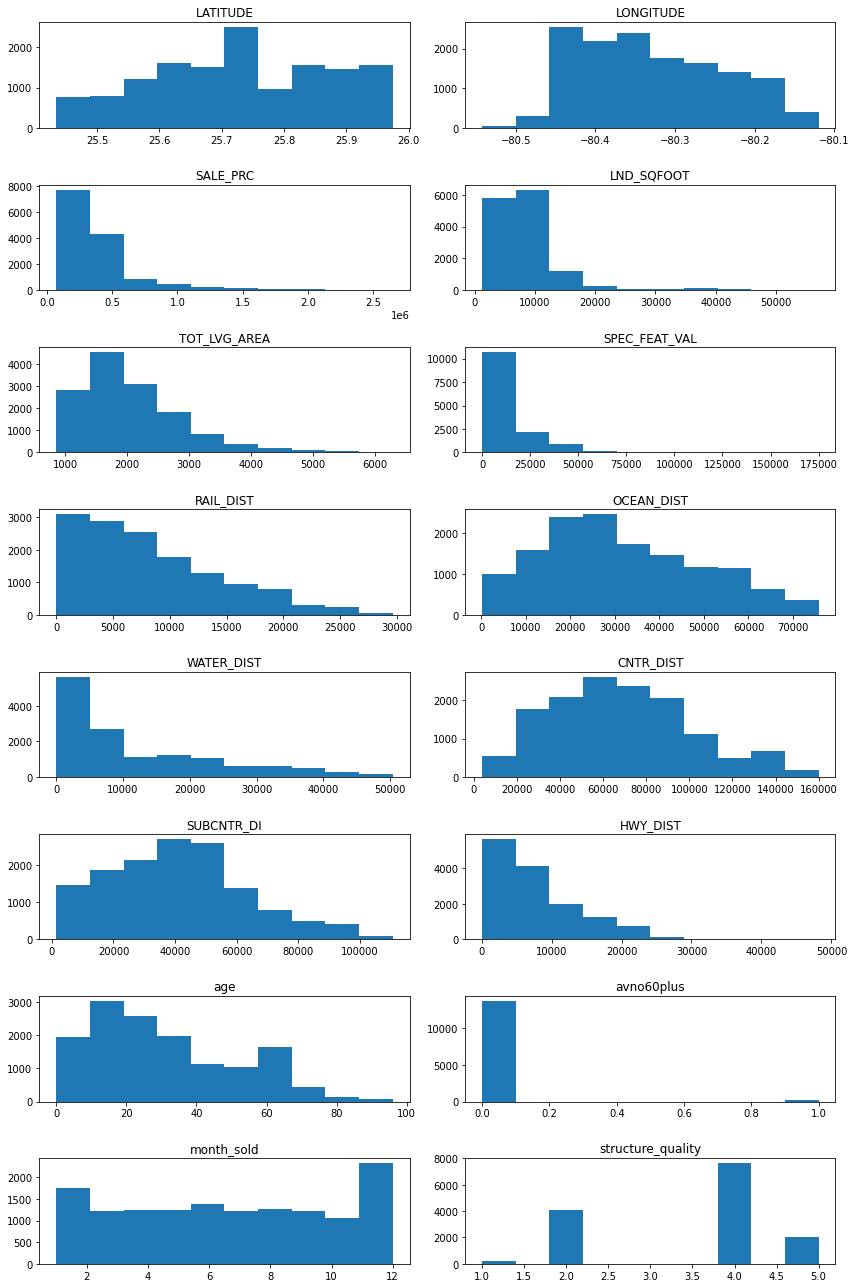

In [275]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

i = 0
fig, axs = plt.subplots(8, 2,tight_layout=True,figsize=(12,18))

for i in range(len(df.columns)):
  axs[int(i/2)][i%2].hist(df[df.columns[i]])
  axs[int(i/2)][i%2].set_title(df.columns[i])
  axs[int(i/2)][i%2].set_title(df.columns[i])

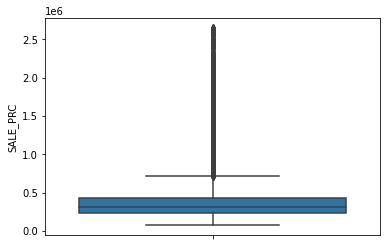

In [276]:
import seaborn as sns

sale_p= df['SALE_PRC']

sns.boxplot(y=sale_p)

In [277]:
quarter(sale_p)

Q1:235000
Q2:310000
Q3:428000
IQR:193000
最大值區間:717500


In [278]:
df_col = df.columns
df_standard = sklearn.preprocessing.scale(df)
df_standard = pd.DataFrame(df_standard,columns=df_col)
df_standard.corr()

,LATITUDE,LONGITUDE,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
LATITUDE,1.000000,0.721232,0.047701,-0.077481,-0.193972,-0.007634,-0.172382,0.242735,-0.423396,-0.717348,-0.195823,-0.113443,0.416967,0.081366,-0.023634,0.391989
LONGITUDE,0.721232,1.000000,0.195274,0.018242,-0.181007,-0.009372,-0.303155,-0.457477,-0.764256,-0.791968,-0.380220,-0.216406,0.488757,0.059416,-0.010859,0.132893
SALE_PRC,0.047701,0.195274,1.000000,0.363077,0.667301,0.497500,-0.077009,-0.274675,-0.127938,-0.271425,-0.370078,0.231877,-0.123408,-0.027026,0.000325,0.383995
LND_SQFOOT,-0.077481,0.018242,0.363077,1.000000,0.437472,0.390707,-0.083901,-0.161579,-0.055093,-0.023181,-0.159094,0.130488,0.101244,-0.005899,0.005926,-0.006686
TOT_LVG_AREA,-0.193972,-0.181007,0.667301,0.437472,1.000000,0.506064,0.075486,-0.050141,0.148343,0.136526,-0.044882,0.229497,-0.340606,-0.056545,0.002517,0.173422
SPEC_FEAT_VAL,-0.007634,-0.009372,0.497500,0.390707,0.506064,1.000000,-0.021965,-0.055155,0.013923,-0.048817,-0.151916,0.153770,-0.098780,-0.008879,-0.014012,0.188030
RAIL_DIST,-0.172382,-0.303155,-0.077009,-0.083901,0.075486,-0.021965,1.000000,0.258966,0.162313,0.444494,0.485468,-0.092495,-0.234515,-0.116955,0.010560,-0.074075
OCEAN_DIST,0.242735,-0.457477,-0.274675,-0.161579,-0.050141,-0.055155,0.258966,1.000000,0.490764,0.245396,0.425869,0.093500,-0.159409,0.035215,-0.012723,0.209497
WATER_DIST,-0.423396,-0.764256,-0.127938,-0.055093,0.148343,0.013923,0.162313,0.490764,1.000000,0.526952,0.195280,0.400233,-0.330578,-0.096339,0.010556,-0.034343
CNTR_DIST,-0.717348,-0.791968,-0.271425,-0.023181,0.136526,-0.048817,0.444494,0.245396,0.526952,1.000000,0.766387,0.076484,-0.548287,-0.130857,0.023096,-0.330588


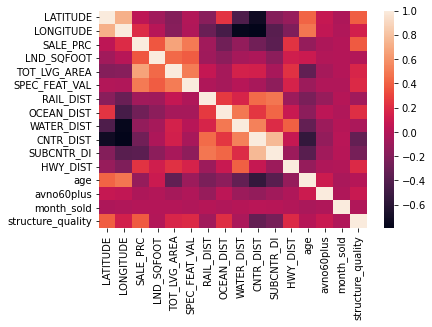

In [279]:
sns.heatmap(df_standard.corr())

In [280]:
#變化最大的是離海的距離,刪掉較貴的房子後離海距離相關性變低,也就是離海邊的距離原本越近越高,但刪了之後離海邊就沒什麼影響了,其他還有LND_SQRFOOT(土地面積)跟TOT_LVG_AREA(floor建築面積)也有些許降低,
#代表較貴的房子可能比較大,刪掉後就沒有辦法產生對比性,相關程度降低
filt = (df['SALE_PRC'] <= 717500)
df_no_outlier = df[filt]
df_standard_no_outlier = sklearn.preprocessing.scale(df_no_outlier)
df_standard_no_outlier = pd.DataFrame(df_standard_no_outlier,columns=df_col)
df_standard_no_outlier.corr()


,LATITUDE,LONGITUDE,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
LATITUDE,1.000000,0.739749,-0.017972,-0.062359,-0.279428,-0.022604,-0.184509,0.277644,-0.423914,-0.745840,-0.224127,-0.129968,0.451672,0.085409,-0.022595,0.397602
LONGITUDE,0.739749,1.000000,-0.071033,-0.011450,-0.362219,-0.103321,-0.332065,-0.400333,-0.760742,-0.793239,-0.358158,-0.306699,0.526634,0.073607,-0.011512,0.065981
SALE_PRC,-0.017972,-0.071033,1.000000,0.304498,0.613621,0.391941,-0.070223,-0.038751,0.114930,-0.128638,-0.324216,0.278515,-0.177600,0.009765,0.046786,0.345515
LND_SQFOOT,-0.062359,-0.011450,0.304498,1.000000,0.313775,0.316476,-0.059585,-0.093469,-0.032851,0.033614,-0.050724,0.153747,0.130256,0.006672,0.004024,-0.072384
TOT_LVG_AREA,-0.279428,-0.362219,0.613621,0.313775,1.000000,0.363478,0.163559,0.093578,0.299264,0.329245,0.143190,0.251418,-0.370962,-0.051841,0.024152,0.022524
SPEC_FEAT_VAL,-0.022604,-0.103321,0.391941,0.316476,0.363478,1.000000,0.021395,0.061542,0.092442,0.044362,-0.046008,0.142529,-0.047247,0.003424,-0.013579,0.087130
RAIL_DIST,-0.184509,-0.332065,-0.070223,-0.059585,0.163559,0.021395,1.000000,0.266323,0.158368,0.456545,0.504215,-0.104248,-0.269446,-0.125077,0.011128,-0.057468
OCEAN_DIST,0.277644,-0.400333,-0.038751,-0.093469,0.093578,0.061542,0.266323,1.000000,0.461906,0.171809,0.361525,0.198622,-0.154010,0.025723,-0.012189,0.340021
WATER_DIST,-0.423914,-0.760742,0.114930,-0.032851,0.299264,0.092442,0.158368,0.461906,1.000000,0.500684,0.149773,0.489809,-0.351595,-0.106514,0.008424,0.028843
CNTR_DIST,-0.745840,-0.793239,-0.128638,0.033614,0.329245,0.044362,0.456545,0.171809,0.500684,1.000000,0.758637,0.128363,-0.599589,-0.147762,0.021887,-0.281870


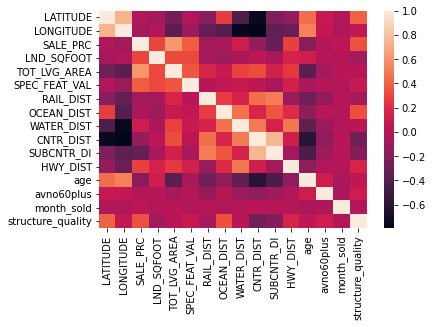

In [281]:
sns.heatmap(df_standard_no_outlier.corr())

In [282]:
df_corr = df_standard.corr().abs()
df_corr['SALE_PRC']
df_corr['SALE_PRC'].sort_values(ascending=False)

SALE_PRC             1.000000
TOT_LVG_AREA         0.667301
SPEC_FEAT_VAL        0.497500
structure_quality    0.383995
SUBCNTR_DI           0.370078
LND_SQFOOT           0.363077
OCEAN_DIST           0.274675
CNTR_DIST            0.271425
HWY_DIST             0.231877
LONGITUDE            0.195274
WATER_DIST           0.127938
age                  0.123408
RAIL_DIST            0.077009
LATITUDE             0.047701
avno60plus           0.027026
month_sold           0.000325
Name: SALE_PRC, dtype: float64

In [283]:
df_data = df.drop('SALE_PRC',1,inplace=False)
df_data

<ipython-input-283-ea239d93cb53>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_data = df.drop('SALE_PRC',1,inplace=False)


,LATITUDE,LONGITUDE,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


In [284]:
#從16個特徵去選
from sklearn import feature_selection as fs 
#利用anova
skb_anova = fs.SelectKBest(fs.f_classif,k=9)
skb_anova.fit_transform(df_data,df['SALE_PRC'])
print(skb_anova.get_feature_names_out())

['LONGITUDE' 'LND_SQFOOT' 'TOT_LVG_AREA' 'SPEC_FEAT_VAL' 'OCEAN_DIST'
 'CNTR_DIST' 'SUBCNTR_DI' 'HWY_DIST' 'structure_quality']


In [285]:
df_data

,LATITUDE,LONGITUDE,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


In [286]:
df_data1 = df_data.drop('LONGITUDE',axis=1)
df_data1

,LATITUDE,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


In [287]:
from sklearn import feature_selection as fs 

#利用卡方
skb_chi = fs.SelectKBest(fs.chi2,k=9)
skb_chi.fit_transform(df_data1,df['SALE_PRC'])
print(skb_chi.get_feature_names_out())

['LND_SQFOOT' 'TOT_LVG_AREA' 'SPEC_FEAT_VAL' 'RAIL_DIST' 'OCEAN_DIST'
 'WATER_DIST' 'CNTR_DIST' 'SUBCNTR_DI' 'HWY_DIST']


In [288]:
list_corr = set(['TOT_LVG_AREA','SPEC_FEAT_VAL','structure_quality','SUBCNTR_DI','LND_SQFOOT','OCEAN_DIST','CNTR_DIST','HWY_DIST','LONGITUDE'])
list_anova = set(['LONGITUDE','LND_SQFOOT','TOT_LVG_AREA','SPEC_FEAT_VAL','OCEAN_DIST'
    ,'CNTR_DIST','SUBCNTR_DI','structure_quality'])
list_chi = set(['LND_SQFOOT','SPEC_FEAT_VAL','RAIL_DIST','OCEAN_DIST','WATER_DIST'
      ,'CNTR_DIST','SUBCNTR_DI','HWY_DIST','TOT_LVG_AREA'])

cols = list(list_corr & list_anova & list_chi)
cols 

['LND_SQFOOT',
 'SPEC_FEAT_VAL',
 'SUBCNTR_DI',
 'OCEAN_DIST',
 'TOT_LVG_AREA',
 'CNTR_DIST']

In [289]:
#移除離群值(sale price較高的)之前
features_df_new = df.loc[:,cols]
features_df_new

,LND_SQFOOT,SPEC_FEAT_VAL,SUBCNTR_DI,OCEAN_DIST,TOT_LVG_AREA,CNTR_DIST
0,9375,0,37742.2,12811.4,1753,42815.3
1,9375,0,37340.5,10648.4,1715,43504.9
2,9375,49206,37328.7,10574.1,2276,43530.4
3,12450,10033,37423.2,10156.5,2058,43797.5
4,12800,16681,37550.8,10836.8,1684,43599.7
...,...,...,...,...,...,...
13927,6780,6580,12150.1,20568.0,967,22175.9
13928,7500,2544,12316.8,20791.9,1854,22375.1
13929,8460,2064,12433.0,20307.9,1271,20966.9
13930,7500,3136,12458.0,20542.6,1613,21475.6


In [290]:
#標準化後找相關係數(尚未移除sale price那部分)
# scale_df_skb = sklearn.preprocessing.scale(features_df_new)
# scale_df_skb = pd.DataFrame(scale_df_skb,columns=features_df_new.columns)
# scale_df_skb.corr()

In [291]:
# filt = (df['SALE_PRC'] <= 717500)
# features_df_new_no_outlier = features_df_new[filt]
# features_df_new_no_outlier

In [292]:
#標準化後找相關係數(移除sale price那部分)
#可以發現離海距離跟離中心距離的相關度變低了,可能較有錢的人移除資料集後,
# scale_df_skb = sklearn.preprocessing.scale(features_df_new_no_outlier)
# scale_df_skb = pd.DataFrame(scale_df_skb,columns=features_df_new_no_outlier.columns)
# scale_df_skb.corr()

In [293]:
# features_df_new_no_outlier.info()

In [294]:
# features_df_new.columns

In [295]:
cols = features_df_new.columns
features_df_new_standard = sklearn.preprocessing.scale(features_df_new)
sale_standard = sklearn.preprocessing.scale(df['SALE_PRC'])

In [296]:
X_train, X_test, y_train, y_test = train_test_split(features_df_new_standard,sale_standard, test_size=0.3, random_state=0)

In [297]:
X_train.shape

(9752, 6)

In [298]:
y_train.shape

(9752,)

In [299]:
from sklearn.metrics import mean_squared_error, r2_score

In [300]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
a  = regr.intercept_#截距
b = regr.coef_#迴歸係數
print("擬合參數:截距",a,'\n')
print('迴歸係數：\n',b,'\n')
str_ = "最佳擬合線:\nY = {}".format(round(a,2))
for i in range(len(b)):
  if b[i]<=0:
    str_+= "  {}".format(round(b[i],2))+" * X{}".format(i+1)
  else:
    str_+= " + {}".format(round(b[i],2))+" * X{}".format(i+1)
print(str_,'\n')
print('R^2: %.3f' % r2_score(y_test,y_pred),'\n')
#adjust_r = 1 - (1-regr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
# print('adjust R^2: %.3f' % adjust_r,'\n')
print('MSE:', mean_squared_error(y_test, y_pred),'\n')
print('score: %.3f'% regr.score(X_test, y_test),'\n')

擬合參數:截距 -0.0011533619674526916 

迴歸係數：
 [-0.01329346  0.16539501 -0.05113385 -0.1422263   0.60991324 -0.27339103] 

最佳擬合線:
Y = -0.0  -0.01 * X1 + 0.17 * X2  -0.05 * X3  -0.14 * X4 + 0.61 * X5  -0.27 * X6 

R^2: 0.627 

MSE: 0.40035469199548984 

score: 0.627 



In [301]:
from sklearn.preprocessing import StandardScaler

In [302]:
df_data

,LATITUDE,LONGITUDE,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


In [303]:
df_data_standard = sklearn.preprocessing.scale(df_data)

In [304]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
model = pca.fit_transform(df_data_standard)
df_pca = pd.DataFrame(model,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])


In [305]:
X_train, X_test, y_train, y_test = train_test_split(df_pca,sale_standard, test_size=0.3, random_state=0)
X_train

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
3090,-1.547579,-0.272223,0.038963,-0.708248,-0.770415,-0.072445
12925,1.965037,-0.004950,-1.195540,-1.637963,-1.613064,0.587244
3149,-2.356107,-1.162632,0.995860,-1.338041,0.274973,-0.330594
6274,-0.227990,0.061508,-0.471875,-0.122894,-1.421455,0.672578
9258,0.046082,-0.496205,1.139732,0.027381,1.201908,-0.620959
...,...,...,...,...,...,...
13123,0.656371,-0.996549,-0.514054,-1.437570,-0.222458,-0.104020
3264,-2.322110,-0.516238,-0.036774,-1.317149,1.273116,-1.196202
9845,2.154367,-1.565248,1.641573,-0.007444,0.622650,-0.154776
10799,4.034121,-1.571073,1.295558,0.072184,0.227950,0.346845


In [306]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
a  = regr.intercept_#截距
b = regr.coef_#迴歸係數
print("擬合參數:截距",a,'\n')
print('迴歸係數：\n',b,'\n')
str_ = "最佳擬合線:\nY = {}".format(round(a,2))
for i in range(len(b)):
  if b[i]<=0:
    str_+= "  {}".format(round(b[i],2))+" * X{}".format(i+1)
  else:
    str_+= " + {}".format(round(b[i],2))+" * X{}".format(i+1)
print(str_,'\n')
print('R^2: %.3f' % r2_score(y_test,y_pred),'\n')
# adjust_r = 1 - (1-regr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
# print('adjust R^2: %.3f' % adjust_r,'\n')
print('MSE:', mean_squared_error(y_test, y_pred),'\n')
print('score: %.3f'% regr.score(X_test, y_test),'\n')

擬合參數:截距 -0.004143894263767685 

迴歸係數：
 [-0.09292459  0.46979636 -0.00054468  0.16939355 -0.06604486 -0.03706885] 

最佳擬合線:
Y = -0.0  -0.09 * X1 + 0.47 * X2  -0.0 * X3 + 0.17 * X4  -0.07 * X5  -0.04 * X6 

R^2: 0.595 

MSE: 0.43411228408528135 

score: 0.595 



In [307]:
from sklearn import ensemble, linear_model, neural_network, metrics
import xgboost
X_train, X_test, y_train, y_test = train_test_split(features_df_new_standard, sale_standard, test_size=0.2, random_state=0)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca, sale_standard, test_size=0.2, random_state=0)
# y_train = y_train.astype(int).astype(float)
# y_test = y_test.astype(int).astype(float)
def print_analysis_r(test, pred):
  print("R2: %.6f" %metrics.r2_score(test, pred))
  print("MSE: %.6f" %metrics.mean_squared_error(test, pred))
  print("MAE: %.6f" %metrics.mean_absolute_error(test, pred))
  print("MAPE: %.6f" %metrics.mean_absolute_percentage_error(test, pred))

In [308]:
rfc = ensemble.RandomForestRegressor()
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)
print('SKB:')
print("以隨機森林回歸模型進行預測：")
print_analysis_r(y_test, rfc_y_pred)
print("Accuracy: %.6f" %rfc.score(X_test, y_test))

SKB:
以隨機森林回歸模型進行預測：
R2: 0.867188
MSE: 0.124327
MAE: 0.170114
MAPE: 5.531721
Accuracy: 0.867188


In [309]:
rfc = ensemble.RandomForestRegressor()
rfc.fit(X_train_pca, y_train_pca)
rfc_y_pred = rfc.predict(X_test_pca)
print('PCA:')
print("以隨機森林回歸模型進行預測：")
print_analysis_r(y_test_pca, rfc_y_pred)
print("Accuracy: %.6f" %rfc.score(X_test_pca, y_test_pca))

PCA:
以隨機森林回歸模型進行預測：
R2: 0.822035
MSE: 0.166596
MAE: 0.195196
MAPE: 9.917568
Accuracy: 0.822035


In [310]:
br = linear_model.BayesianRidge()
br.fit(X_train, y_train)
br_y_pred = br.predict(X_test)
print('SKB:')
print("以貝氏回歸模型進行預測：")
print_analysis_r(y_test, br_y_pred)
print("Accuracy: %.6f" %br.score(X_test, y_test))

SKB:
以貝氏回歸模型進行預測：
R2: 0.620564
MSE: 0.355196
MAE: 0.391314
MAPE: 10.653428
Accuracy: 0.620564


In [311]:
br = linear_model.BayesianRidge()
br.fit(X_train_pca, y_train_pca)
br_y_pred = br.predict(X_test_pca)
print('PCA:')
print("以貝氏回歸模型進行預測：")
print_analysis_r(y_test_pca, br_y_pred)
print("Accuracy: %.6f" %br.score(X_test_pca, y_test_pca))

PCA:
以貝氏回歸模型進行預測：
R2: 0.601506
MSE: 0.373037
MAE: 0.384576
MAPE: 8.428604
Accuracy: 0.601506


In [312]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
print('SKB:')
print("以eXtreme Gradient Boosting回歸模型進行預測：")
print_analysis_r(y_test, xgb_y_pred)
print("Accuracy: %.6f" %xgb.score(X_test, y_test))

[14:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SKB:
以eXtreme Gradient Boosting回歸模型進行預測：
R2: 0.830424
MSE: 0.158743
MAE: 0.209987
MAPE: 7.761107
Accuracy: 0.830424


In [313]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train_pca, y_train_pca)
xgb_y_pred = xgb.predict(X_test_pca)
print('PCA:')
print("以eXtreme Gradient Boosting回歸模型進行預測：")
print_analysis_r(y_test_pca, xgb_y_pred)
print("Accuracy: %.6f" %xgb.score(X_test_pca, y_test_pca))

[14:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
PCA:
以eXtreme Gradient Boosting回歸模型進行預測：
R2: 0.786312
MSE: 0.200037
MAE: 0.244767
MAPE: 8.644706
Accuracy: 0.786312


In [315]:
mlp = neural_network.MLPRegressor()
mlp.fit(X_train, y_train)
mlp_y_pred = mlp.predict(X_test)
print('SKB:')
print("以多層感知器回歸模型進行預測：")
print_analysis_r(y_test, mlp_y_pred)
print("Accuracy: %.6f" %mlp.score(X_test, y_test))

SKB:
以多層感知器回歸模型進行預測：
R2: 0.845227
MSE: 0.144886
MAE: 0.194920
MAPE: 9.314315
Accuracy: 0.845227


In [317]:
mlp = neural_network.MLPRegressor()
mlp.fit(X_train_pca, y_train_pca)
mlp_y_pred = mlp.predict(X_test_pca)
print('PCA:')
print("以多層感知器回歸模型進行預測：")
print_analysis_r(y_test_pca, mlp_y_pred)
print("Accuracy: %.6f" %mlp.score(X_test_pca, y_test_pca))

PCA:
以多層感知器回歸模型進行預測：
R2: 0.843838
MSE: 0.146186
MAE: 0.205882
MAPE: 10.046289
Accuracy: 0.843838


In [191]:
# rfc_cr = metrics.classification_report(y_test, rfc_y_pred)
# gnb_cr = metrics.classification_report(y_test, gnb_y_pred)
# mlp_cr = metrics.classification_report(y_test, mlp_y_pred)
# X_train, X_test, y_train, y_test = train_test_split(df_pca,sale_standard, test_size=0.2, random_state=1)
# unique, counts = np.unique(y_test, return_counts=True)
# print(unique)
# print(counts)

[-1.03385410e+00 -1.02439644e+00 -1.02124389e+00 -1.01556930e+00
 -1.00863368e+00 -1.00422011e+00 -1.00390485e+00 -9.92870921e-01
 -9.88142092e-01 -9.86565816e-01 -9.84989540e-01 -9.80260711e-01
 -9.77423414e-01 -9.77108159e-01 -9.70803054e-01 -9.69226778e-01
 -9.67650502e-01 -9.64497950e-01 -9.63867439e-01 -9.61345397e-01
 -9.55040293e-01 -9.51887740e-01 -9.49050443e-01 -9.45582636e-01
 -9.42114828e-01 -9.40853807e-01 -9.39277531e-01 -9.36124979e-01
 -9.29819874e-01 -9.26667322e-01 -9.23514769e-01 -9.20362217e-01
 -9.14057112e-01 -9.03023179e-01 -8.98294351e-01 -8.91989246e-01
 -8.90412970e-01 -8.88836694e-01 -8.85684141e-01 -8.84107865e-01
 -8.82531589e-01 -8.70236635e-01 -8.69921380e-01 -8.66768827e-01
 -8.60463723e-01 -8.57311170e-01 -8.54158618e-01 -8.51006066e-01
 -8.35558559e-01 -8.35243304e-01 -8.31460241e-01 -8.30514476e-01
 -8.28938200e-01 -8.25785647e-01 -8.23263605e-01 -8.22633095e-01
 -8.19480543e-01 -8.13805948e-01 -8.11599162e-01 -8.10022886e-01
 -8.06870333e-01 -8.03717